# Visualize the apparent quasar proper motions caused by the acceleration of the solar sytem barycentre

Use the results from [Gaia Collaboration, Klioner, et al. (2020)]() to visualize the apparent proper motions of quasars caused by the acceleration of the solar system barycentre (also known as 'Galactic aberration'). Use equation (4) from the paper to calculate the apparent proper motions.

\begin{equation}
    \begin{aligned}
        \mu_{\alpha*} &= -g_x\sin\alpha + g_y\cos\alpha\,, \\
        \mu_\delta &=-g_x\sin\delta\cos\alpha - g_y\sin\delta\sin\alpha +g_z\cos\delta\,,
    \end{aligned}
\end{equation}

or in Galactic coordinates

\begin{equation}
    \begin{aligned}
        \mu_{\ell*} &= -g_X\sin\ell + g_Y\cos\ell\,, \\
        \mu_b &=-g_X\sin b\cos\ell - g_Y\sin b\sin\ell +g_Z\cos b\,,
    \end{aligned}
\end{equation}

The quantities $g$ are listed in table 2 of the paper. Below the values in Galactic coordinates are used.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.patches import ArrowStyle

from astropy_healpix import HEALPix
import astropy_healpix.healpy as hp
from astropy.coordinates import Galactic
import astropy.units as u

import cartopy.crs as ccrs

## Calculate the apparent proper motions of quasars

Using the above formulae we can calculate the apparent proper motions of quasars. This is done for a set of positions on the sky generated as a Healpix grid. The `astropy_healpix` facilities are used for this.

In [4]:
gx = 5.04
gy = -0.10
gz = -0.29

hplevel = 5
nside = hp.order2nside(hplevel)
npix = hp.nside2npix(nside)
ahp = HEALPix(nside=nside, order='nested', frame=Galactic())

hpindices = np.arange(npix)
skycoords = ahp.healpix_to_skycoord(hpindices)

pm_l_cosb = -gx * np.sin(skycoords.l.to(u.rad)) + gy * np.cos(skycoords.l.to(u.rad))
pm_b = -gx * np.sin(skycoords.b.to(u.rad)) * np.cos(skycoords.l.to(u.rad)) \
      -gy * np.sin(skycoords.b.to(u.rad)) * np.sin(skycoords.l.to(u.rad)) \
      +gz * np.cos(skycoords.b.to(u.rad))

backgr = plt.imread('../star-trail-animation/sky-images/' + 
                    'ESA_Gaia_DR2_AllSky_Brightness_Colour_Cartesian_2000x1000.png')

## Show the apparent quasar proper motions as streamlines on the sky

Compare the resulting plot to figure 2 in [Gaia Collaboration, Klioner et al. (2020)](). The apparent quasar proper motions converge on the point toward which the acceleration vector for the solar system barycentre points, $(\ell,b) = (358.9^\circ, -3.3^\circ)$.

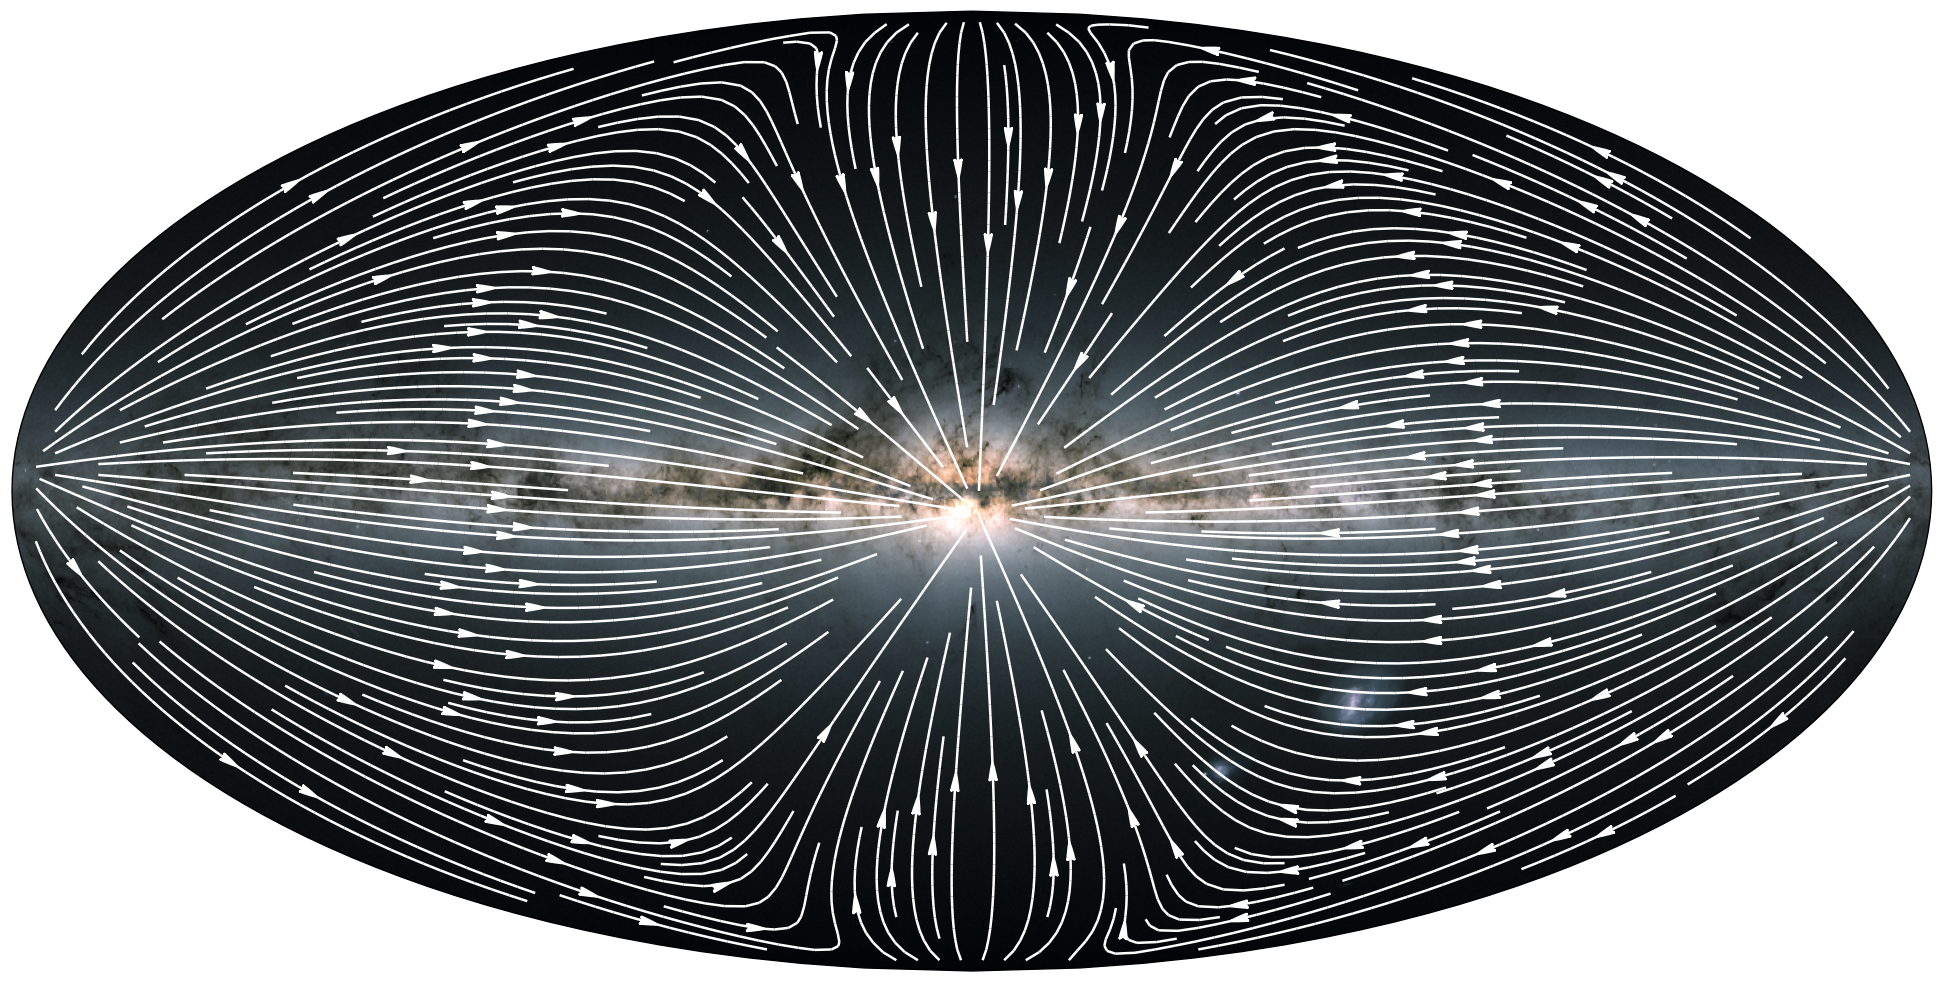

In [6]:
defaultProj = ccrs.PlateCarree()
skyProj = ccrs.Mollweide()
    
fig=plt.figure(figsize=(16,9), dpi=120, frameon=False, tight_layout={'pad':0.01})
gs = GridSpec(1, 1, figure=fig)
ax = fig.add_subplot(gs[0,0], projection=skyProj)
ax.imshow(np.fliplr(backgr), transform=defaultProj, zorder=-1, origin='upper')
ax.streamplot(skycoords.l.value, skycoords.b.value, pm_l_cosb.value, pm_b.value,
              transform=defaultProj, linewidth=1.5, density=3, color='w', maxlength=1.0, arrowsize=1,
              arrowstyle=ArrowStyle.Fancy(head_length=1.0, head_width=.4, tail_width=.4))
#ax.gridlines()
ax.invert_xaxis()

plt.savefig("qso-proper-motions-solar-system-acceleration.png")
plt.show()